## Intoduction
* Data provides information on the fate of passengers on the Titanic,
* summarized according to economic status (class), sex, age and survival.
* we are asked to predict whether a passenger on the titanic would have been survived or not.

In [4]:
## importing libariaries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import pygwalker as pyg

In [5]:
## importing data

In [3]:
training = pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")

In [4]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA

In [7]:
walker = pyg.walk(training)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

In [9]:
df_num = training[["Age", "SibSp", "Parch", "Fare"]]
df_cat = training[["Survived", "Sex", "Cabin", "Embarked", "Ticket"]]

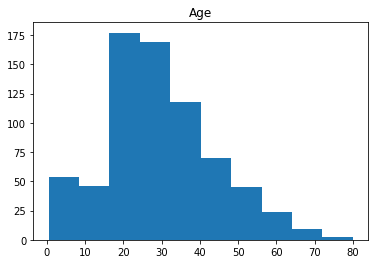

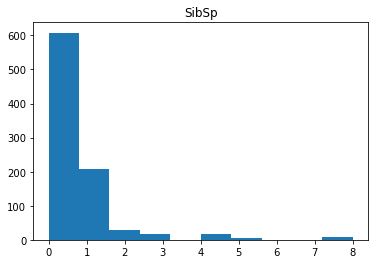

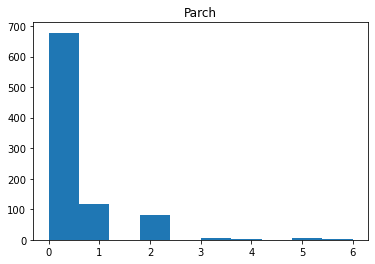

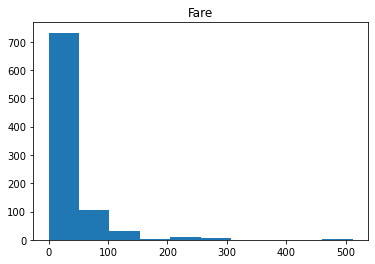

In [10]:
for e in df_num.columns:
    plt.hist(df_num[e])
    plt.title(e)
    plt.show()

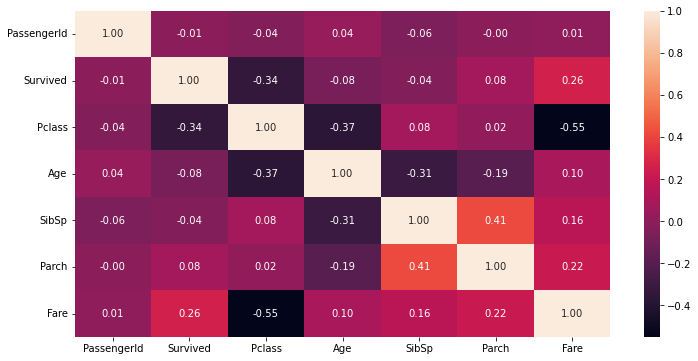

In [14]:
plt.figure(figsize=(12, 6))
corr = training.corr()
sns.heatmap(corr, annot=True, fmt=".2f");

In [15]:
pd.pivot_table(training, index="Survived", values=["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


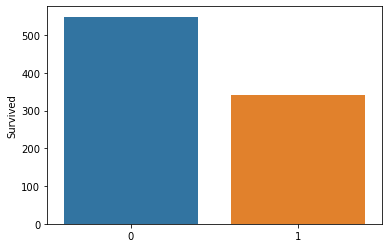

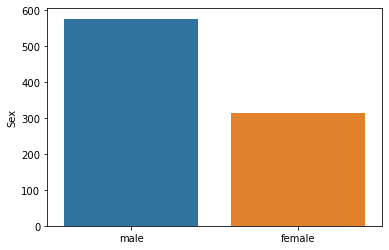

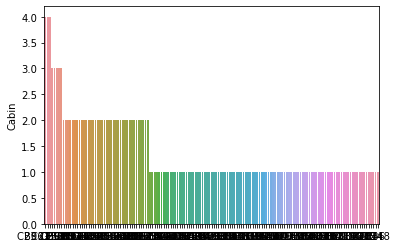

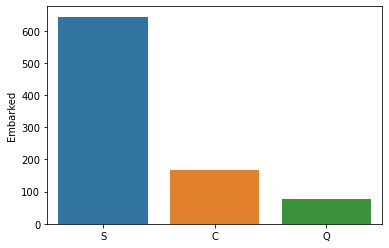

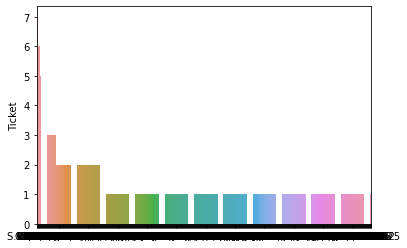

In [24]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.show()

## Out findings
* After analysis of the data , we can conclude some out finding which same have impact on the survival:
* Pclass have a negative correlation with sutvival(-0.34)
* Fare have a positive corelation with survival(0.26)
* nothing that chace of survival increase with max. fare
* nothing that parch 0 has more survial than other types
* nothing that female from different age (as total female) is surviived than man
* unneccasary parameter like passengerid, ticket, cabin and names

## Data cleaning / processing

In [18]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
training["Age"] = training["Age"].fillna(training["Age"].mean())
training["Embarked"] = training["Embarked"].fillna(training["Embarked"].mode()[0])

In [23]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [26]:
# drop un nessacary data
training = training.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])

## Feature Enginneering


In [28]:
from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in cols:
    training[col] = le.fit_transform(training[col])

training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [29]:
# train test split

In [30]:
from sklearn.model_selection import train_test_split
X = training.drop(columns=["Survived"], axis=1)
y = training["Survived"]
training

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


## Building Model

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


def evaluate_models(X, y, models, cv=5):
    results = {}
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, cv=cv)
        results[model_name] = {
            'accuracy': np.mean(scores),
            'cv_score': scores.mean()
        }
    return results

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    LogisticRegression(),
    SVC(kernel='linear', C=1),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=5)
]

results = evaluate_models(X_train, y_train, models)
for model, result in results.items():
    print(f"Model: {model}, Accuracy: {result['accuracy']:.3f}, CV Score: {result['cv_score']}")

C:\Users\Ali Mahdy\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ali Mahdy\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Model: LogisticRegression, Accuracy: 0.793, CV Score: 0.7934797596769428
Model: SVC, Accuracy: 0.788, CV Score: 0.7878853540825371
Model: RandomForestClassifier, Accuracy: 0.798, CV Score: 0.7978134541514823
Model: KNeighborsClassifier, Accuracy: 0.687, CV Score: 0.6868807249088938


## Model testing

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8156424581005587


# The Accuracy of the Model is 81.6%